![title](img/GMIT-Galway-Campus.jpg)


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import norm
from scipy.stats import ttest_rel
import random
#from scipy.special import comb
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html
#import math
#from math import comb
import math
from math import comb

# Tasks
***

# Task 1: Lady Tasting Tea
### Permutations and Combinations
***

### About the Lady Tasting Tea dataset

***

The Lady Tasting Tea is a randomized experiment devised by Ronald Fisher and reported in his book The Design of Experiments (1935). The experiment is the original exposition of Fisher's notion of a null hypothesis[1] Lady tasting tea, wikipedia, https://en.wikipedia.org/wiki/Lady_tasting_tea. The experiment provides the subject with eight random cups of tea, four are prepared by adding milk first and then tea & four are prepared by adding tea first and then milk. The way each cup of tea is not known by the subject. The subject attempts to select the 4 cups prepared by one method or the other.

The assumption that the subject had no skill in selecting the correct answer is known as the null hypothesis. It was introduced by Fisher, who also proposed a threshold probability of 1-in-20 or 5 per cent as a limit for statistical significance. [2] How a tea-tasting test led to a breakthrough in statistics, irishtimes, https://www.https://www.irishtimes.com/news/science/how-a-tea-tasting-test-led-to-a-breakthrough-in-statistics-1.3998786
The null hypothesis is assumed to be true unless evidence emerges that indicates that it is invalid.  The null hypothesis is often denoted as H0 :  It represents an assumption that no significant difference, effect, or relationship exists between variables within a population. It serves as a baseline assumption, positing no observed change or effect occurring. The null is the truth or falsity of an idea in analysis. [3] Null Hypothesis, geeksforgeeks, https://www.geeksforgeeks.org/null-hypothesis/. if the subject 

![title](img/null-hypothesis-example-and-definition.jpg)

-- 1 Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

-- 1.1 Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

-- 1.2 Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

-- 1.3 Would you accept two errors? Explain.

1.1 Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

In [6]:
# create variable and asign a value 12, to represent each cup in experiment
no_cups = 12
# create variable and asign a value 6, to represent each cup where milk is added first
no_cups_milk_first = 6
# math.comb returns the number of ways to chose k items from n items without regard to order.
total_ways = math.comb(no_cups, no_cups_milk_first)
print(f'The number of permutations for 12 cups is {total_ways}.')

The number of permutations for 12 cups is 924.


In [7]:
# Calculate the probability of selecting the correct six cups
probability = 1 / total_ways

print(f"The probability of selecting the correct six cups is {probability:.10f}")

The probability of selecting the correct six cups is 0.0010822511


In [8]:
import itertools
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [9]:
combs = list(itertools.combinations(labels, no_cups_milk_first))


In [10]:
combs[:20]

[(0, 1, 2, 3, 4, 5),
 (0, 1, 2, 3, 4, 6),
 (0, 1, 2, 3, 4, 7),
 (0, 1, 2, 3, 4, 8),
 (0, 1, 2, 3, 4, 9),
 (0, 1, 2, 3, 4, 10),
 (0, 1, 2, 3, 4, 11),
 (0, 1, 2, 3, 5, 6),
 (0, 1, 2, 3, 5, 7),
 (0, 1, 2, 3, 5, 8),
 (0, 1, 2, 3, 5, 9),
 (0, 1, 2, 3, 5, 10),
 (0, 1, 2, 3, 5, 11),
 (0, 1, 2, 3, 6, 7),
 (0, 1, 2, 3, 6, 8),
 (0, 1, 2, 3, 6, 9),
 (0, 1, 2, 3, 6, 10),
 (0, 1, 2, 3, 6, 11),
 (0, 1, 2, 3, 7, 8),
 (0, 1, 2, 3, 7, 9)]

In [11]:
# Number of combinations.
len(combs)

924

In [12]:
labels_milk = random.sample(labels, 4)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[2, 4, 5, 7]

In [13]:
set(labels_milk)

{2, 4, 5, 7}

In [14]:
# Calculate the overlap between each element of combs and labels_milk.

no_overlaps = []

for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  print(comb, overlap, len(overlap))
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

(0, 1, 2, 3, 4, 5) {2, 4, 5} 3
(0, 1, 2, 3, 4, 6) {2, 4} 2
(0, 1, 2, 3, 4, 7) {2, 4, 7} 3
(0, 1, 2, 3, 4, 8) {2, 4} 2
(0, 1, 2, 3, 4, 9) {2, 4} 2
(0, 1, 2, 3, 4, 10) {2, 4} 2
(0, 1, 2, 3, 4, 11) {2, 4} 2
(0, 1, 2, 3, 5, 6) {2, 5} 2
(0, 1, 2, 3, 5, 7) {2, 5, 7} 3
(0, 1, 2, 3, 5, 8) {2, 5} 2
(0, 1, 2, 3, 5, 9) {2, 5} 2
(0, 1, 2, 3, 5, 10) {2, 5} 2
(0, 1, 2, 3, 5, 11) {2, 5} 2
(0, 1, 2, 3, 6, 7) {2, 7} 2
(0, 1, 2, 3, 6, 8) {2} 1
(0, 1, 2, 3, 6, 9) {2} 1
(0, 1, 2, 3, 6, 10) {2} 1
(0, 1, 2, 3, 6, 11) {2} 1
(0, 1, 2, 3, 7, 8) {2, 7} 2
(0, 1, 2, 3, 7, 9) {2, 7} 2
(0, 1, 2, 3, 7, 10) {2, 7} 2
(0, 1, 2, 3, 7, 11) {2, 7} 2
(0, 1, 2, 3, 8, 9) {2} 1
(0, 1, 2, 3, 8, 10) {2} 1
(0, 1, 2, 3, 8, 11) {2} 1
(0, 1, 2, 3, 9, 10) {2} 1
(0, 1, 2, 3, 9, 11) {2} 1
(0, 1, 2, 3, 10, 11) {2} 1
(0, 1, 2, 4, 5, 6) {2, 4, 5} 3
(0, 1, 2, 4, 5, 7) {2, 4, 5, 7} 4
(0, 1, 2, 4, 5, 8) {2, 4, 5} 3
(0, 1, 2, 4, 5, 9) {2, 4, 5} 3
(0, 1, 2, 4, 5, 10) {2, 4, 5} 3
(0, 1, 2, 4, 5, 11) {2, 4, 5} 3
(0, 1, 2, 4, 6, 7) {2, 4, 7} 3
(

In [15]:
# Show the overlaps.
print(no_overlaps)

[3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 4, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 

In [16]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4]), array([ 28, 224, 420, 224,  28], dtype=int64))

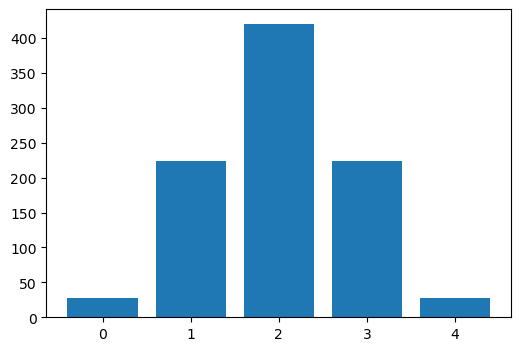

In [17]:
# Create a figure.
fig, ax = plt.subplots(figsize=(6, 4))

# Bar chart.
ax.bar(counts[0], counts[1]);

In [18]:
# Total number of cups
no_cups = 12 

# Number of cups with milk in first
no_cups_milk_first = 6

# Calculate the total number of ways to choose 6 cups out of 12
total_ways = math.comb(no_cups, no_cups_milk_first)

# Calculate the number of ways to choose the correct 6 cups
correct_ways = 1

In [19]:
from math import comb
ways_5_correct_1_incorrect = comb(no_cups_milk_first, 5) * comb(no_cups - no_cups_milk_first, 1)
#probability_at_most_1_error

In [20]:
# Probability of selecting at least 5 correct cups (0 or 1 error)
probability_at_most_1_error = (correct_ways + ways_5_correct_1_incorrect) / total_ways
probability_at_most_1_error

0.04004329004329004

# Task 2: numpy's Normal Distribution
***


-- In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.

-- Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output.

-- Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

The probability density function of the normal distribution is often called the bell curve because of its  shape. It is also called e Gaussian Distribution.  The normal distribution is a continuous probability distribution which is symmetric around the mean. [1] Normal Distribution | Definition, Uses & Examples, geeksforgeeks, https://www.geeksforgeeks.org/normal-distribution/
The parameters are 

-- loc: (mean),
-- scale: (standard deviation) 
-- size: (number to create) 


I will use the following code to generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.

In [21]:
sample = np.random.normal(loc=10, scale=3, size = 100000)

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution. Shapiro-Wilk test is a hypothesis test that evaluates whether a data set is normally distributed. It evaluates data from a sample with the null hypothesis that the data set is normally distributed. A large p-value indicates the data set is normally distributed, a low p-value indicates that it isn’t normally distributed.[1] An Introduction to the Shapiro-Wilk Test for Normality,  | Definition, Uses & Examples, builtin.com, https://builtin.com/data-science/shapiro-wilk-test


In [23]:
stat, p_value = shapiro(sample)
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p_value}")

Shapiro-Wilk Test Statistic: 0.999963677687491
P-value: 0.38536524458675103


The Shapiro-Wilk test checks the null hypothesis that the data was drawn from a normal distribution. Here's how to interpret the results:

P-value > 0.05: We fail to reject the null hypothesis. This means there is no significant evidence to suggest that the sample data does not come from a normal distribution.
P-value ≤ 0.05: We reject the null hypothesis, indicating that the sample data does not come from a normal distribution.

In [24]:
# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("The sample appears to come from a normal distribution (fail to reject H0).")
else:
    print("The sample does not appear to come from a normal distribution (reject H0).")

The sample appears to come from a normal distribution (fail to reject H0).


## Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

The norm.pdf is a function from scipy stats module that computes the the probability density function (PDF) of a normal distribution. Probability Density Function (PDF) is a fundamental concept in probability theory that describes the relative likelihood of values in a continuous distribution. The PDF of a random variable X is defined as the derivative of its cumulative distribution function (CDF). The PDF represents the probability density at each point in the distribution and integrates to 1 over the entire range of values. [1] Working with Scipy Stats Norm: A Guide, pieriantraining.com, https://pieriantraining.com/working-with-scipy-stats-norm-a-guide/

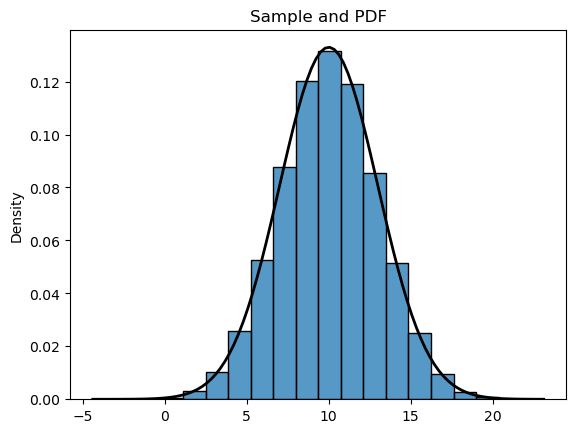

In [ ]:
# Plot the normal distribution probability density function (PDF)
mean = 10.0
std_dev = 3.0
# x= 100 points betweeen min and max of sample array
x = np.linspace(min(sample), max(sample), 100)
#ttps://pieriantraining.com/working-with-scipy-stats-norm-a-guide/
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)

title = "Sample and PDF" 
plt.title(title)
sns.histplot(sample, bins=20,stat="density")
# Show the plot
plt.show()


# Task 3: t-Test Calculation
***

Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

Patient ID	0	1	2	3	4	5	6	7	8	9
Before	63	68	70	64	74	67	70	57	66	65
After	64	64	68	64	73	70	72	54	61	63

Calculate the t-statistic based on this data set, using Python. Compare it to the value given by scipy.stats. Explain your work and list any sources used.

The t-statistic, also known as the t-value or Student’s t, is a measure derived from the t-distribution. It is used in hypothesis testing to determine whether to reject the null hypothesis

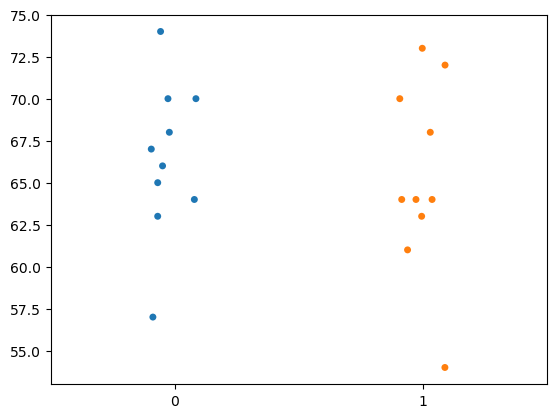

In [294]:
# Data
before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
after = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])

sns.stripplot(data=[before, after]);


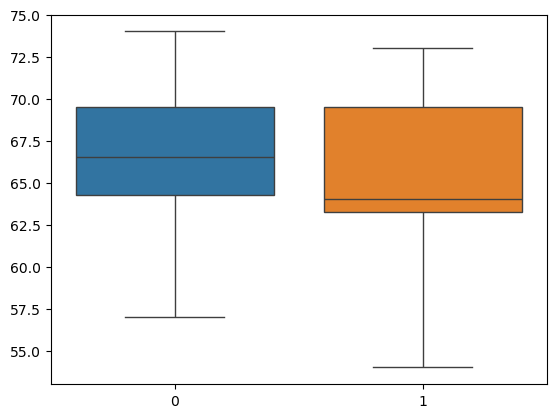

In [295]:
sns.boxplot(data=[before, after]);

Steps :
-- Calculate the differences between the before and after values.
-- Compute the mean of these differences.
-- Calculate the standard deviation of the differences.
-- Determine the number of observations.
-- Calculate the t-statistic using the formula: 
        t=mean difference/standard deviation of differences/n

In [296]:
# Calculate the differences
differences = before - after

In [297]:
# Calculate the mean of the differences
mean_diff = np.mean(differences)

 [2] Bessel's correction, WIKIPEDIA, https://en.wikipedia.org/wiki/Bessel%27s_correction

dd0f means Delta Degrees of Freedom.  The divisor used in calculations is N - ddof, where N represents the number of elements. By default ddof is zero.  [2] numpy.std, NumPy, https://numpy.org/doc/stable/reference/generated/numpy.std.html


The divisor used in the calculation of the standard deviation is ( n - 1 ) instead of ( n ). This adjustment is known as Bessel's correction and is used to provide an unbiased estimate of the population standard deviation from a sample.Using ddof=1 is common practice when calculating the sample standard deviation because it corrects the bias in the estimation of the population variance and standard deviation. Without this correction, the sample standard deviation would tend to underestimate the population standard deviation.  [2] Bessel's correction, WIKIPEDIA, https://en.wikipedia.org/wiki/Bessel%27s_correction

In [298]:
# Calculate the standard deviation of the differences
std_diff = np.std(differences, ddof=1)


In [299]:
# Calculate the number of observations
n = len(differences)

# Calculate the t-statistic
t_statistic_manual = mean_diff / (std_diff / np.sqrt(n))


In [300]:
print(f"T-statistic: {t_statistic_manual}")
#print(f"P-value: {p_value}")

T-statistic: 1.3372274824806283


### Using Sistats

In [301]:
# Perform a t-test.
stats.ttest_ind(before, after)

TtestResult(statistic=0.4740968275126808, pvalue=0.6411310132871086, df=18.0)

In [302]:
# Calculate the t-statistic and p-value for the paired sample
t_statistic, p_value = ttest_rel(before, after)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 1.337227482480628
P-value: 0.21396011317404623


In [303]:
# Paired samples t-test.
stats.ttest_rel(before, after)

TtestResult(statistic=1.337227482480628, pvalue=0.21396011317404623, df=9)

Both methods return t-statisic value of ~1.33722

Task 4: Anova

In this test we will estimate the probability of committing a type II error in specific circumstances. 

-- To begin, create a variable called no_type_ii and set it to 0.

-- Now use a loop to perform the following test 10,000 times.

-- Use numpy.random.normal to generate three samples with 100 values each. Give each a standard deviation of 0.1. Give the first sample a mean of 4.9, the second a mean of 5.0, and the third a mean of 5.1.

-- Perform one-way anova on the three samples and add 1 to no_type_ii whenever a type II error occurs.

-- Summarize and explain your results.

In [304]:
# Initialize the variable @ 0
no_type_ii = 0

# Perform the test 10,000 times
for _ in range(10000):
    # Generate three samples with 100 values with std dev @ 0.1 and mean of 4.9,5 & 5.1
    sample1 = np.random.normal(4.9, 0.1, 100)
    sample2 = np.random.normal(5.0, 0.1, 100)
    sample3 = np.random.normal(5.1, 0.1, 100)

In [305]:
data = np.concatenate([sample1, sample2, sample3])

In [306]:
# Create the labels.
labels = ['sample1'] * 100 + ['sample2'] * 100 + ['sample3'] * 100

# Show.
labels

['sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sample1',
 'sa

In [307]:
df = pd.DataFrame({'sample': labels, 'value': data})
df

,sample,value
0,sample1,4.920135
1,sample1,4.772527
2,sample1,4.815303
3,sample1,4.843314
4,sample1,4.979736
...,...,...
295,sample3,5.220753
296,sample3,5.231504
297,sample3,5.100231
298,sample3,5.150910


In [308]:
a_sample = df[df['sample'] == 'sample1']['value']
i_times = df[df['sample'] == 'sample2']['value']
a_times = df[df['sample'] == 'sample3']['value']

In [309]:
# Perform ANOVA.
f, p = stats.f_oneway(a_sample, i_times, a_times)

# Show.
f, p

(120.11106842481472, 5.976935634841708e-39)

In [310]:
alpha = 0.05
if p_value > alpha:
    no_type_ii += 1

print(f"F-statistic: {f}, p-value: {p}")
print(f"Number of Type II errors: {no_type_ii}")

F-statistic: 120.11106842481472, p-value: 5.976935634841708e-39
Number of Type II errors: 1


In [311]:
# Tukey's HSD.
res = stats.tukey_hsd(a_sample, i_times, a_times)

# Show.git 
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.116     0.000    -0.149    -0.083
 (0 - 2)     -0.217     0.000    -0.251    -0.184
 (1 - 0)      0.116     0.000     0.083     0.149
 (1 - 2)     -0.101     0.000    -0.134    -0.068
 (2 - 0)      0.217     0.000     0.184     0.251
 (2 - 1)      0.101     0.000     0.068     0.134



[1] Lady tasting tea, wikipedia, https://en.wikipedia.org/wiki/Lady_tasting_tea 
[2] How a tea-tasting test led to a breakthrough in statistics, irishtimes, https://www.https://www.irishtimes.com/news/science/how-a-tea-tasting-test-led-to-a-breakthrough-in-statistics-1.3998786
[3] Null Hypothesis, geeksforgeeks, https://www.geeksforgeeks.org/null-hypothesis/